## Problem Statement
### Predicting Survival in the Titanic Data Set
##### We will be using a decision tree to make predictions about the Titanic data set from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.

# Importing the files and Data Reading

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
#url= 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
#titanic = pd.read_csv(url)
titanic = pd.read_csv("titanic.csv")

#titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

In [2]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data analysis


In [3]:
print("===== survived by class and sex")
print(titanic.groupby(["Pclass", "Sex"])["Survived"].value_counts(normalize=True))

===== survived by class and sex
Pclass  Sex     Survived
1       female  1           0.968085
                0           0.031915
        male    0           0.631148
                1           0.368852
2       female  1           0.921053
                0           0.078947
        male    0           0.842593
                1           0.157407
3       female  0           0.500000
                1           0.500000
        male    0           0.864553
                1           0.135447
Name: Survived, dtype: float64


From the above data we found that women has more chance of survivors – the women chance of survival rate is 96.8%, 92.1% and 50% depending on the class of ticket. The chance of surviving men is less, respectively, 36.9%, 15.7% and 13.5%.
Also Class 1 has more change of survivals.

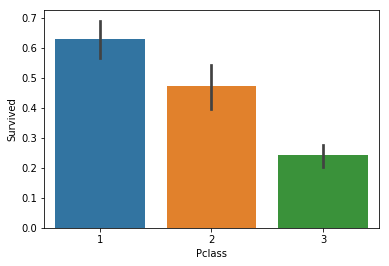

In [4]:
sns.barplot(x='Pclass', y='Survived', data=titanic)

            

Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1. We will create another pclass plot below.



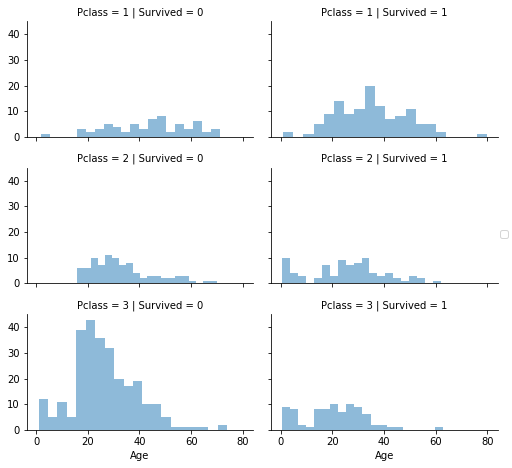

In [5]:
grid = sns.FacetGrid(titanic, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

The plot above confirms our assumption about pclass 1, but we can also spot a high probability that a person in pclass 3 will not survive.

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
titanic['relatives'] = titanic['SibSp'] + titanic['Parch']
titanic.loc[titanic['relatives'] > 0, 'not_alone'] = 0
titanic.loc[titanic['relatives'] == 0, 'not_alone'] = 1
titanic['not_alone'] = titanic['not_alone'].astype(int)
titanic['not_alone'].value_counts()
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


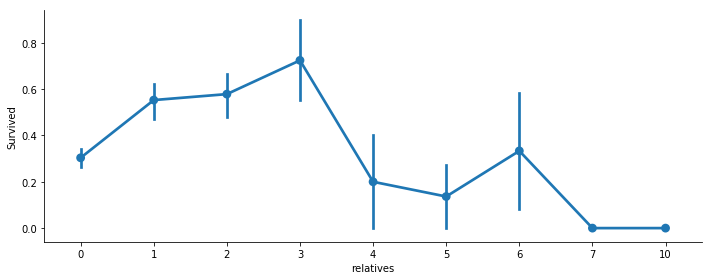

In [8]:
axes = sns.factorplot('relatives','Survived', 
                      data=titanic, aspect = 2.5, )

Here we can see that you had a high probabilty of survival with 1 to 3 realitves, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).

## Survival on Age and Sex

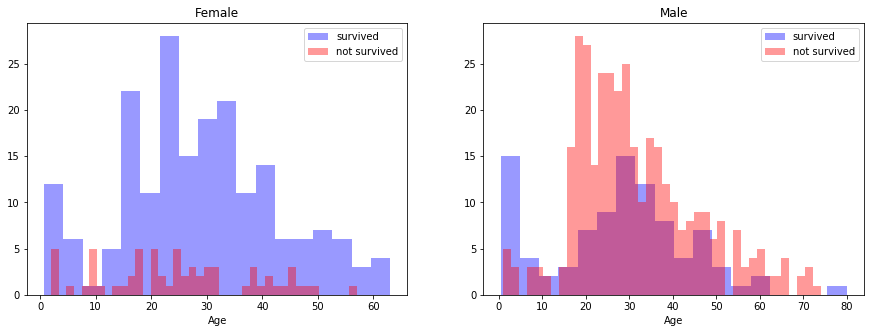

In [9]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
women = titanic[titanic['Sex']=='female']
men = titanic[titanic['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False, color ='b' )
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False, color='r' )
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False, color ='b' )
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False, color ='r' )
ax.legend()
_ = ax.set_title('Male')

You can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.

For men the probability of survival is very low between the age of 5 and 18, but that isn’t true for women. Another thing to note is that infants also have a little bit higher probability of survival.

Since there seem to be certain ages, which have increased odds of survival and because I want every feature to be roughly on the same scale, I will create age groups later on.

        Survived
Sex             
female  0.742038
male    0.188908


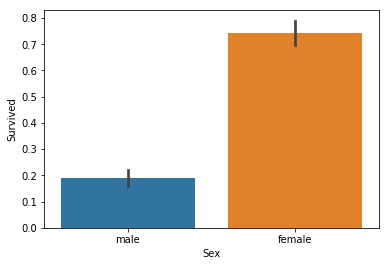

In [10]:
print(titanic[['Sex', 'Survived']].groupby(['Sex']).mean())
sns.barplot(x='Sex', y='Survived',   data=titanic)

In the above diagram, Women had a much higher chance of survival than men.

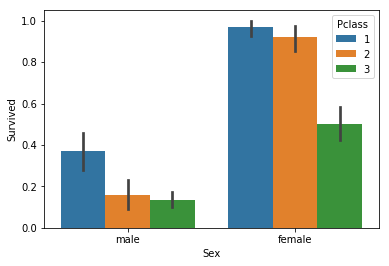

In [11]:
sns.barplot(x='Sex', y='Survived',   data=titanic, hue='Pclass')


Class 1 had a higher survival rate then class2 and so on Class1 > Class2 > Class3

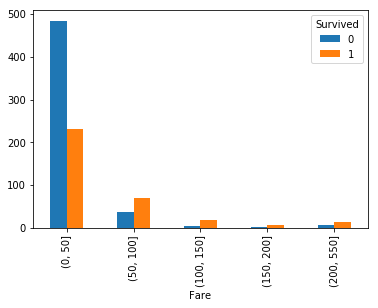

In [12]:
group = pd.cut(titanic.Fare, [0,50,100,150,200,550])
piv_fare = titanic.pivot_table(index=group, columns='Survived', values = 'Fare', aggfunc='count')
piv_fare.plot(kind='bar')

 As the fare higher, so does the chances of survival.

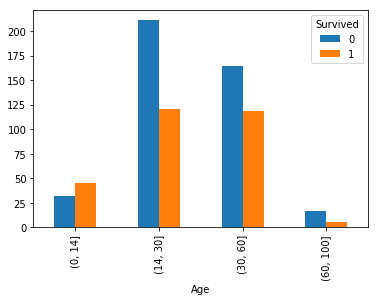

In [13]:
group = pd.cut(titanic.Age, [0,14,30,60,100])
piv_fare = titanic.pivot_table(index=group, columns='Survived', values = 'Age', aggfunc='count')
piv_fare.plot(kind='bar')

Looks like Children had a higher chance of survival even though Age as a whole is not a strongly correlated feature with Survived.



### There are some important fields which we would be considering for this assignment, other we are ignoring

In [14]:
describe_fields = ["Age", "Fare", "Pclass", "SibSp", "Parch", "Survived"]

print("===== train: males ===================")
print(titanic[titanic["Sex"] == "male"][describe_fields].describe())

print("===== train: females =================")
print(titanic[titanic["Sex"] == "female"][describe_fields].describe())


===== train: males ===================
              Age        Fare      Pclass       SibSp       Parch    Survived
count  453.000000  577.000000  577.000000  577.000000  577.000000  577.000000
mean    30.726645   25.523893    2.389948    0.429809    0.235702    0.188908
std     14.678201   43.138263    0.813580    1.061811    0.612294    0.391775
min      0.420000    0.000000    1.000000    0.000000    0.000000    0.000000
25%     21.000000    7.895800    2.000000    0.000000    0.000000    0.000000
50%     29.000000   10.500000    3.000000    0.000000    0.000000    0.000000
75%     39.000000   26.550000    3.000000    0.000000    0.000000    0.000000
max     80.000000  512.329200    3.000000    8.000000    5.000000    1.000000
===== train: females =================
              Age        Fare      Pclass       SibSp       Parch    Survived
count  261.000000  314.000000  314.000000  314.000000  314.000000  314.000000
mean    27.915709   44.479818    2.159236    0.694268    0.64968

In [15]:
# is null check
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
relatives        0
not_alone        0
dtype: int64

#### Age which is the important column and it is missing approximately by 20%. This needs to be imputed by some means.

In [16]:
titanic.shape

(891, 14)

In [17]:
# Finding the % of missing data from the Titanic Data
total = titanic.isnull().sum().sort_values(ascending=False)
percent_1 = titanic.isnull().sum()/titanic.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
not_alone,0,0.0
relatives,0,0.0


### Data Preprocessing
#### Dropping following unimportant columns to make the data Proper
- Ticket Number 
- Cabin
- Embarked
- Passenger Id 
- Name

In [18]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,1,0


In [19]:
titanic.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'relatives',
       'not_alone'], dtype=object)

In [20]:
titanic.drop(['PassengerId', 'Name', 'Embarked','Cabin','Ticket','relatives','not_alone' ], axis=1, inplace=True)
# Dropping 2 addition columns relatives and not_alone due to time constraints
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [21]:
titanic["Age"].fillna(titanic["Age"].mean(), inplace=True)

In [22]:
titanic["Sex"] = titanic["Sex"].map({'female':0, 'male':1}).astype(int)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [23]:
X =  titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
Y =  titanic['Survived']

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.3, random_state = 0)

In [25]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
from sklearn.metrics import accuracy_score
predicted = model.predict(X_test)
print('Accuracy for the test data set \n')
print(format(accuracy_score(Y_test, predicted)*100, '.2f'), '%')

Accuracy for the test data set 

80.60 %


### Perform Grid search on the parameter and use the best estimator for scoring on validation set

In [27]:
from sklearn.model_selection import GridSearchCV

param_test1 = {
    'max_depth' : range(2,5), 
    'min_samples_split' : [2,3,5],
    'min_samples_leaf' : [1,2,3]
    
}
grid_result = GridSearchCV(DecisionTreeClassifier() , param_grid = param_test1, cv = 10, n_jobs = -1, verbose = 1)
grid_result.fit(X_train,Y_train)
print("Best Result : %f using %s" % (grid_result.best_score_*100 , grid_result.best_params_))

Fitting 10 folds for each of 27 candidates, totalling 270 fits
Best Result : 82.022472 using {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    7.2s finished


In [28]:
print('Accuracy for the test data set \n')
predicted = grid_result.predict(X_test)
print(format(accuracy_score(Y_test, predicted)*100, '.2f'), '%')

Accuracy for the test data set 

82.46 %


####  Model Now acieved the accuracy of 82.5 % 

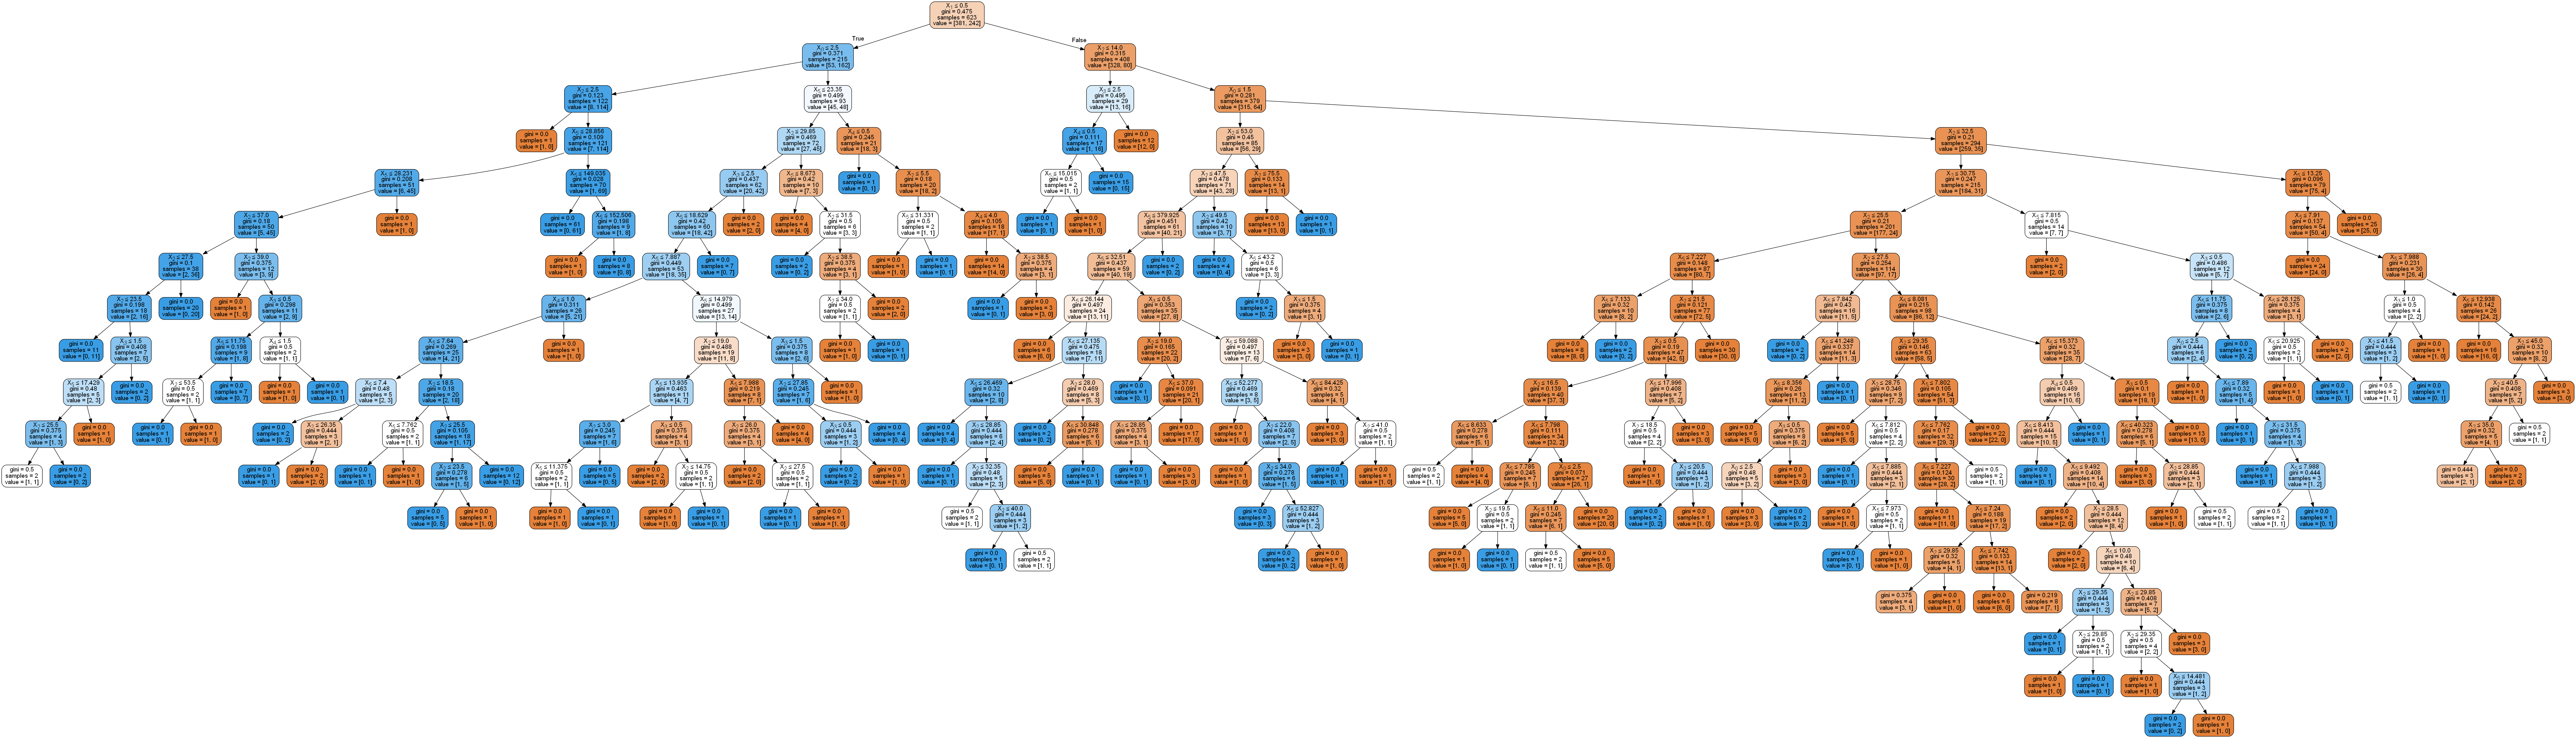

In [29]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
#import graphviz
#import StringIO
#from StringIO import StringIO
from io import StringIO
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())